In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./../../data/Student_Performance.csv')
print(df.head())
print(df.columns)
print(df.info())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='str')
<class 'pandas.DataFram

In [2]:
# target and predictors
y = df['Performance Index']
X = df.drop(columns=['Performance Index'])

In [4]:
# feature engineering
# One hot encoding  for categorical features i.e. Extracurricular Activities (Yes/No)
X = pd.get_dummies(X,drop_first=True)

discrete_features = X.dtypes == int
print("Num discrete:", discrete_features.sum())

Num discrete: 4


In [5]:
# mutual information for correlation between target and predictors
'''
Our target 'Performance Index' is real-valued therefore use mutual regression
if MI = 1 then predictor is dependent on target if not is independent
'''
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

Previous Scores                     0.919623
Hours Studied                       0.148839
Sleep Hours                         0.005579
Sample Question Papers Practiced    0.005000
Extracurricular Activities_Yes      0.001892
Name: MI Scores, dtype: float64


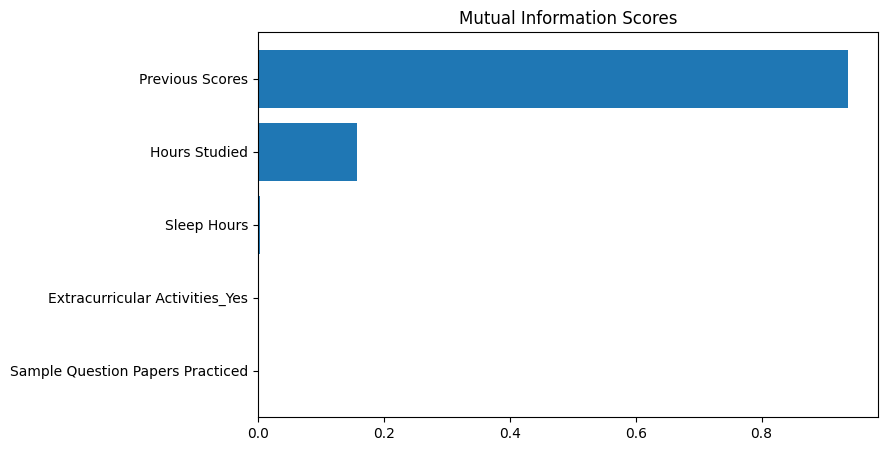

In [5]:
# plot MI
'''
Plot MI
'''
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()

R2 Score LF: 0.9889832909573145
R2 Score RF: 0.9865150160759688
MAE LF: 1.611121346312304
MAE RF: 1.7851902161226156


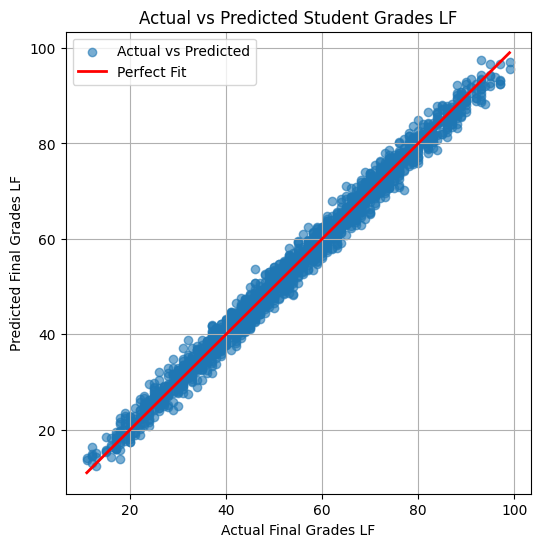

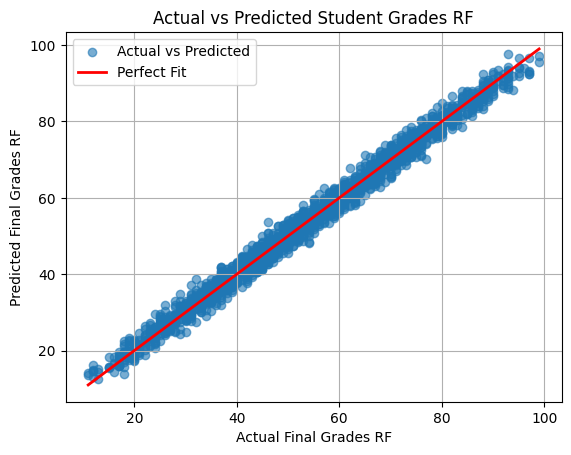

In [6]:
#  MODEL TRAINING
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X_train, X_valid, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_LF = LinearRegression()
model_RF = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model_LF.fit(X_train,y_train)
model_RF.fit(X_train,y_train)
y_pred_LF = model_LF.predict(X_valid)
y_pred_RF = model_RF.predict(X_valid)
print(f"R2 Score LF: {r2_score(y_test,y_pred_LF)}")
print(f"R2 Score RF: {r2_score(y_test,y_pred_RF)}")
print(f"MAE LF: {mean_absolute_error(y_test,y_pred_LF)}")
print(f"MAE RF: {mean_absolute_error(y_test,y_pred_RF)}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_LF,alpha=0.6, label='Actual vs Predicted');
max_val_lf = max(max(y_test), max(y_pred_LF))
min_val_lf = min(min(y_test), min(y_pred_LF))
plt.plot([min_val_lf, max_val_lf], [min_val_lf, max_val_lf], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Final Grades LF')
plt.ylabel('Predicted Final Grades LF')
plt.title('Actual vs Predicted Student Grades LF')
plt.legend()
plt.grid(True)
plt.show()


plt.scatter(y_test, y_pred_LF,alpha=0.6, label='Actual vs Predicted');
max_val_rf = max(max(y_test), max(y_pred_RF))
min_val_rf = min(min(y_test), min(y_pred_RF))
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Final Grades RF')
plt.ylabel('Predicted Final Grades RF')
plt.title('Actual vs Predicted Student Grades RF')
plt.legend()
plt.grid(True)
plt.show()
plt.show()
